In [2]:
from time import sleep

def long_running_function(word_to_find):
    sleep(1)

def run():
    for idx in range(3):
        long_running_function('')
%timeit run()

3.01 s ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
from multiprocessing import Pool, cpu_count

## pool of worker,  create instances, hvis vi bruger flere end vores cpu bliver også langsomere
pool = Pool(processes = cpu_count())

##%timeit r = pool.map(long_running_function, range(40))
r = pool.map(long_running_function, range(40))
print(len(r))

40


In [8]:
from functools import partial
from multiprocessing import Pool, cpu_count

## pool of worker,  create instances, hvis vi bruger flere end vores cpu bliver også langsomere
pool = Pool(processes = cpu_count())
#r = pool.map((long_running_function,'love'), range(40))

In [12]:
%matplotlib notebook
import matplotlib as plt
from sklearn.datasets.samples_generator import make_blobs



In [14]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [24]:
# 3个中心点坐标
centers = [[1, 1], [-1, -1], [1, -1]]

## make_blobs用来生成聚类算法的测试数据
## make_blobs会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。
## n_samples 待生成的样本的总数，centers中心点，cluster_std误差
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)


In [28]:
## estimate_bandwidth函数用作于mean-shift算法估计带宽, return 1.02527203136
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)


ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
## unsupervicer && supervicer machine learning
## Dette kode er unsupervicer
ms.fit(X)
print(ms)

## return list of labels
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#print("number of estimated clusters : %d" % n_clusters_)


MeanShift(bandwidth=1.0252720313632955, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)


In [ ]:
def my_function:
    label, car, flower = [],[],[]
    return label, car, flower

## version1: her return de 3 collections i en tuple
result = my_function()

## version2 : unpakking de 3 lister, _ betyder hvis vi vil ikke have den 2. variabel
res1, _, res2 = my_function()


<IPython.core.display.Javascript object>


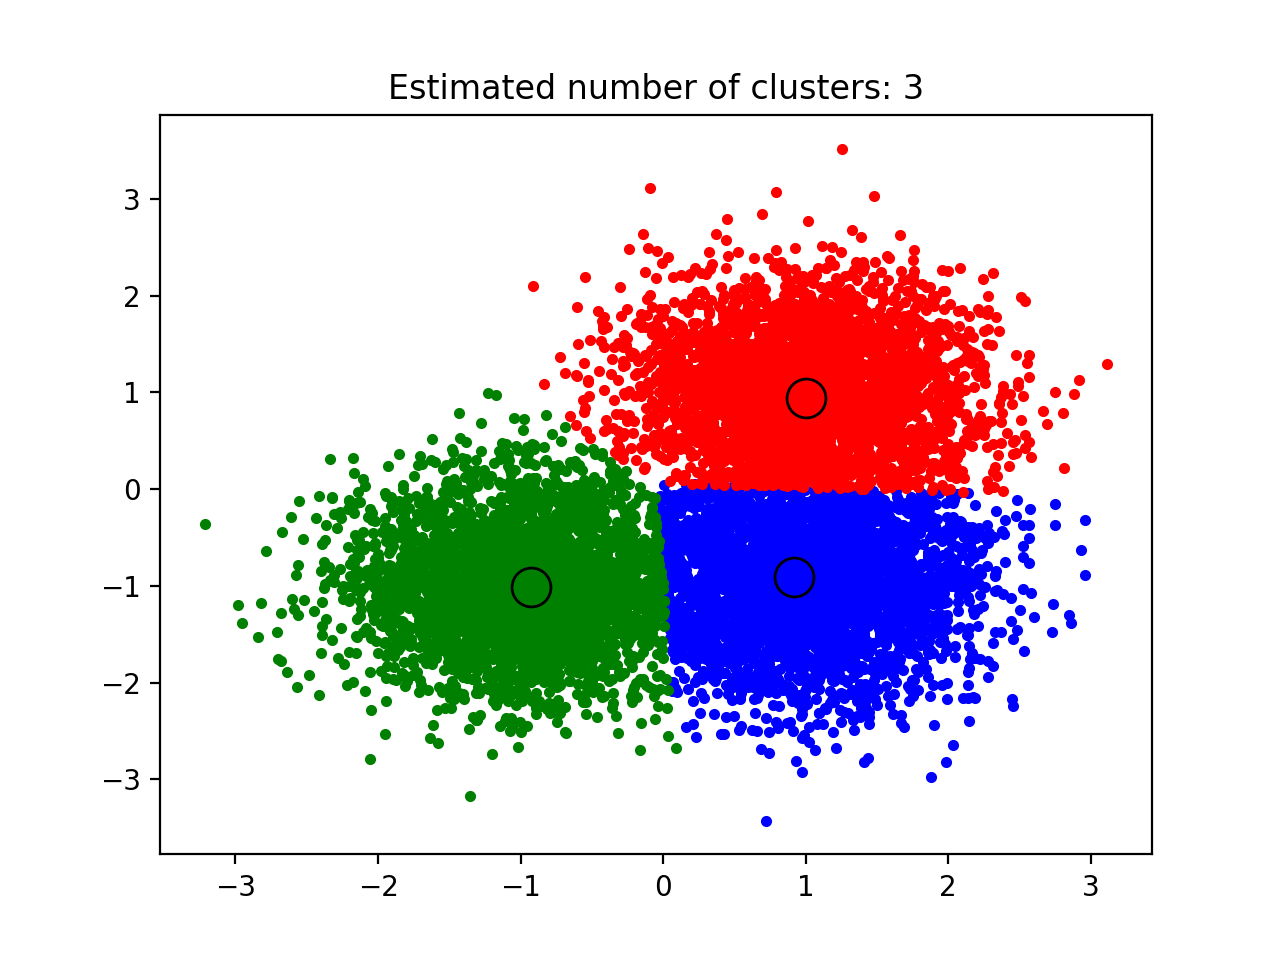

In [29]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
## colors er cycle of a list of string 
## generator of zip collection of tuple
## names of clusters, f.eks. a cluster, b cluster
for k, col in zip(range(n_clusters_), colors):
    ## boolean question
    ## labels f.eks. er 0, får den color b
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ## give me the collection of y value and colletion of x value
    
    ## my_members er coordinates of list ([1,2],[2,1],[2,1],[3,1])
    ## [my_members, 0] betyder giver mig 0 cluster på den list
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()